# Escalonando os atributos

Neste exemplo, veremos como o escalonamento dos atributos afeta o desempenho do algoritmo do gradiente descendente.

In [1]:
# Import all necessary libraries
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import random
import urllib
# Retrieve file from github.
url = 'https://raw.githubusercontent.com/zz4fap/t319_aprendizado_de_maquina/main/misc/util_functions.py'
urllib.request.urlretrieve(url, filename='./util_functions.py')
import util_functions as util

In [2]:
# Always reset the pseudo-random numbers generator to a known value so that your results are always the same.
np.random.seed(1234)

## Gerando o conjunto de treinamento

In [3]:
# Number of pairs attribute/label.
N = 10000

Os atributos são

$$x_1 = 10 \times \text{randn()} + 10,$$ 

$$x_2 = \text{randn()}.$$

Notem que o intervalo de variação de $x_1 \gg x_2$.

A função verdadeira é dada por

$$y = x_1 + x_2,$$

onde $a_1$ e $a_2$ são iguais a 1.

In [4]:
# Attribute 1
x1 = 10.0*np.random.randn(N, 1) + 10.0

# Attribute 2
x2 = np.random.randn(N, 1) 

# Target function.
y = x1 + x2

# Noise.
w = np.random.randn(N, 1)

# Noisy version.
y_noisy = y + w

# Concatenate both column vectors to create the attribute matrix.
X = np.c_[x1, x2]

**OBS**.: Percebam que o atributo $x_1$ tem um intervalo de variação maior do que o de $x_2$, pois sua variância é maior, e, além disso, sua média não é 0 e sim, 10. Isso pode ser melhor visualizado através dos histogramas mostrados na figura abaixo.

## 1. Sem escalonamento dos atributos

Plotando os histogramas dos atributos x1 e x2

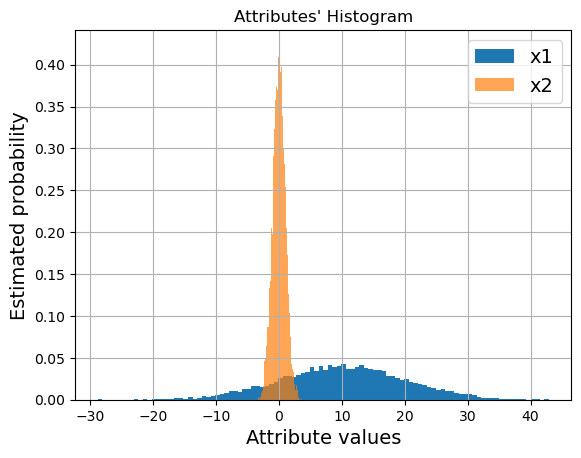

In [5]:
# Histograma dos atributos x1 e x2
util.plotHistogram(x1, x2)

### Encontrando os melhores pesos com o gradiente descendente em batelada

A função hipotese que usaremos tem o seguinte formato:

$$h(\textbf{x}) = \hat{a}_1 x_1 + \hat{a}_2 x_2.$$

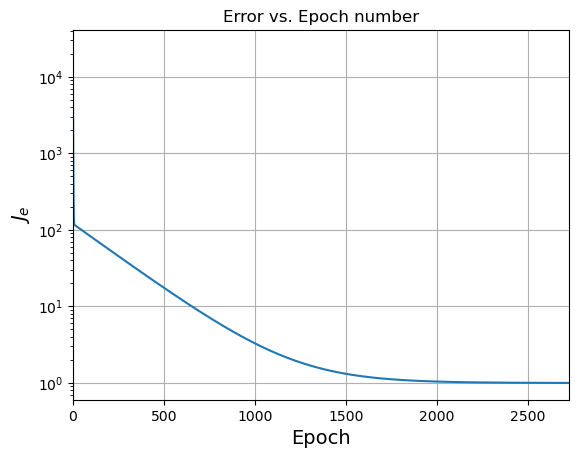

In [6]:
# learning rate.
alpha = 0.001

# Maximum number of iterations.
n_iterations = 10000

# Execute the gradient descent algorithm to find a solution to this regression problem.
a, Jgd, a_hist, grad_hist, iteration = util.batchGradientDescent(X, y_noisy, alpha, n_iterations)

# Plot the error versus the number of iterations.
util.plotErroVersusIteration(Jgd, iteration)

**Observação**.: Percebam na figura acima, que levou mais de 2000 épocas para que o algoritmo convergisse. Isso é devido ao formato do superfície de erro, a qual é plotada logo abaixo.

### Encontrando os pesos ótimos com a equação normal.

In [7]:
# Closed-form solution.
a_opt = util.calculateOptimumWeights(X, y_noisy)

### Plotando as superfícies de erro e de contorno

**OBS**.: A estrela vermelha na superfície de contorno indica a solução ótima encontrada com a equação normal.

In [8]:
# Generate points for plotting the cost-function surface without feature scaling.
J, A1, A2 = util.calculateErrorSurface(X, y_noisy)

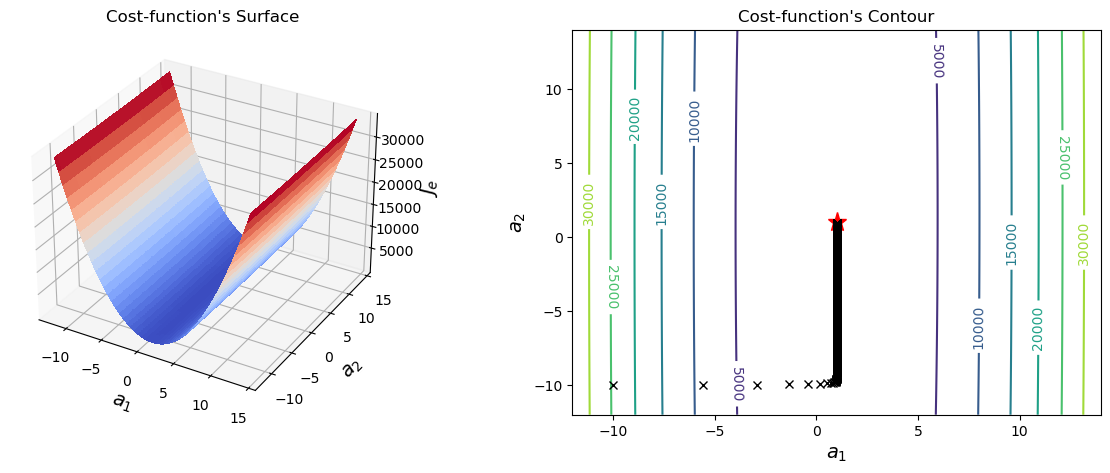

In [9]:
# Plot cost-function surface.
util.plotCostFunction(A1, A2, J, a_opt, a_hist, iteration)

#### Observações

+ Quando $x_1 \gg x_2$: erro varia mais rapidamente com variações de $\hat{a}_1$, resultando em um formato de vale.
<br/><br/>

+ O gradiente descendente sempre caminha na direção de máxima declividade, mas aqui, ele não aponta (caminha) diretamente para o ponto de mínimo global.
<br/><br/>

+ Inicialmente, a direção de máxima declividade está quase que paralela ao eixo do peso $\hat{a}_1$, pois $x_1$ tem intervalo de variação maior.
<br/><br/>

+ Porém, quando o algoritmo chega à base do vale, a inclinação se torna pequena, fazendo com que o gradiente também seja pequeno. Consequentemente, as atualização dos pesos serão pequenas.
    + Convergência lenta devido ao formato da superfície.
    + Convergência só ocorre após 2000 épocas.
<br/><br/>

+ Devido a superfície de erro ter o formato de vale, o gradiente descendente apresenta dificuldades ao caminhar ao longo da direção onde a superfície é praticamente plana, ou seja, ao longo da direção paralela ao eixo do peso $\hat{a}_2$. Isso ocorre, pois a variação do erro, i.e., a inclinação da superfície, é muito maior na direção de $\hat{a}_1$ do que na direção de $\hat{a}_2$. Portanto, como pode ser visto, o gradiente descendente se desloca mais rapidamente na direção de $\hat{a}_1$. Porém, quando ele chega à base do vale, a varição do erro é muito pequena, i.e., inclinação da superfície, fazendo com que os valores dos vetores gradientes sejam muito pequenos. Isto faz com que as atualizações dos pesos sejam, consequentemente, pequenas, resultando em uma convergência bem lenta conforme pode ser visto na figura da superfície de contorno acima.

### Plotando o histórico dos valores do vetor gradiente ao longo das épocas de treinamento

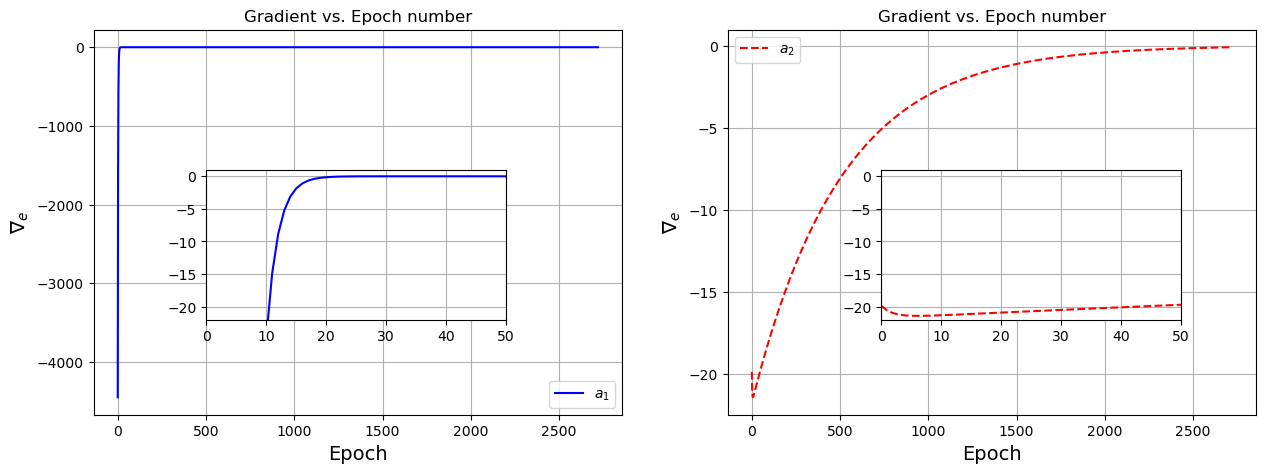

In [10]:
util.plotGradientHistory(grad_hist, iteration, x_max=50)

**Observações**

+ Percebam que o gradiente varia muito mais rapidamente com relação ao peso $\hat{a}_1$ do que com o peso $\hat{a}_2$. 
+ Isso se deve ao fato da superfície ser mais íngreme na direção de $\hat{a}_1$.
+ Como os valores dos vetores gradiente variam lentamente em relação ao peso $\hat{a}_2$, a convergência se torna lenta, consecutivamente.

## 2. Padronizando os atributos

+ Agora iremos aplicar padronização aos atributos, trazendo-os para um intervalo mais similar.
<br/><br/>

+ Utilizamos a classe `StandardScaler` do módulo `preprocessing` da biblioteca SciKit-Learn.
<br/><br/>

+ O método `fit_transform` calcula a média e o devio padrão de cada atributo e, em seguida, aplica a padronização a cada exemplo da base de dados.

In [11]:
# Import Class StandardScaler from module Preprocessing of 
# library sklearn responsible for standardizing the data.
from sklearn.preprocessing import StandardScaler

# Instantiate a Standard scaler.
stdScaler = StandardScaler()

# Standardize the features.
scaled_X = stdScaler.fit_transform(X)

scaled_x1 = scaled_X[:,0].reshape(N,1)
scaled_x2 = scaled_X[:,1].reshape(N,1)

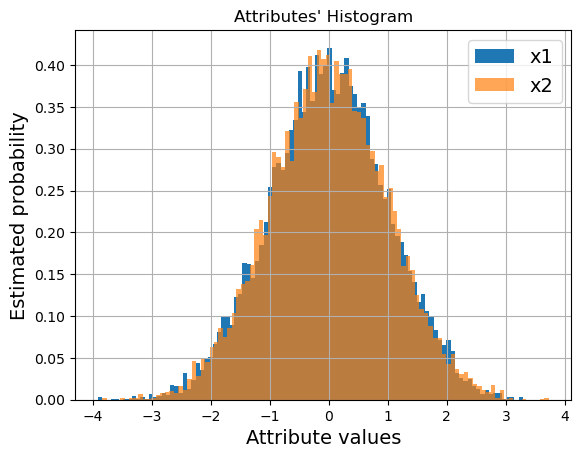

In [12]:
util.plotHistogram(scaled_x1, scaled_x2)

**Observações**:
    
+ Percebam que após a padronização, os intervalos de variação dos atributos passaram a ser similares.

### Encontrando os melhores pesos com o gradiente descendente em batelada

A função hipotese que usaremos tem o seguinte formato:

$$h(\textbf{x}) = \hat{a}_1 x_1 + \hat{a}_2 x_2.$$

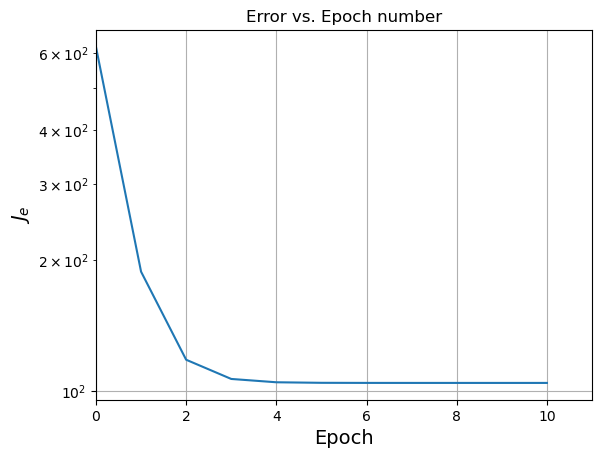

In [13]:
# learning rate.
alpha = 0.3

# Maximum number of iterations.
n_iterations = 10000

# Execute the gradient descent algorithm to find a solution to this regression problem.
a, Jgd, a_hist, grad_hist, iteration = util.batchGradientDescent(scaled_X, y_noisy, alpha, n_iterations)

# Plot the error versus the number of iterations.
util.plotErroVersusIteration(Jgd, iteration)

**Observação**.: Percebam na figura acima, que o algoritmo convergiu após 4 épocas de treinamento. Isso é devido ao formato do superfície de erro, a qual é plotada logo abaixo.

### Encontrando os pesos ótimos com a equação normal.

In [14]:
# Closed-form solution.
a_opt_pad = util.calculateOptimumWeights(scaled_X, y_noisy)

### Plotando as superfícies de erro e de contorno

**OBS**.: A estrela vermelha na superfície de contorno indica a solução ótima encontrada com a equação normal.

In [15]:
# Generate points for plotting the cost-function surface without feature scaling.
J, A1, A2 = util.calculateErrorSurface(scaled_X, y_noisy, -10.0, 30.0, -19.0, 21.0)

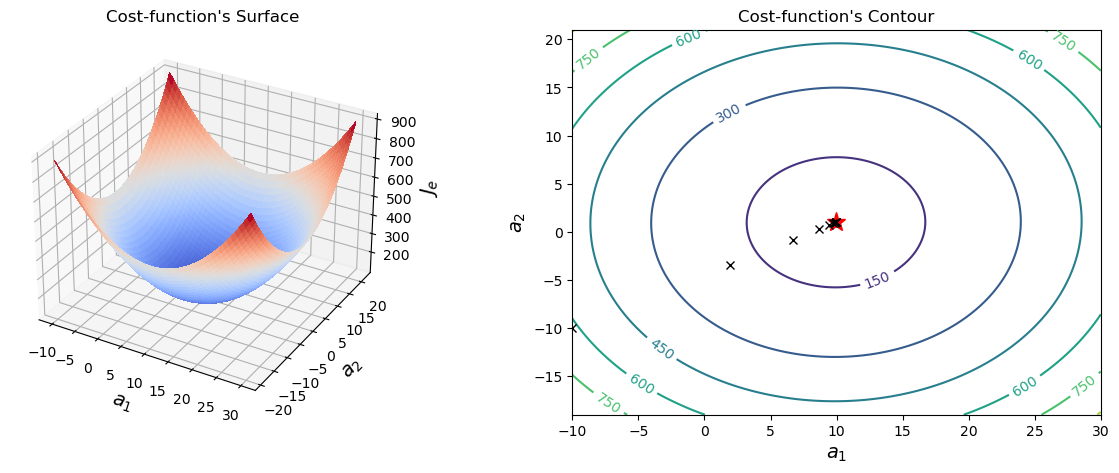

In [16]:
# Plot cost-function surface.
util.plotCostFunction(A1, A2, J, a_opt_pad, a_hist, iteration)

#### Observações

+ Quando $x_1$ e $x_2$ têm intervalos de variação semelhantes, então, a variação tanto de $\hat{a}_1$ quanto de $\hat{a}_2$ tem peso semelhante na variação do erro (i.e., no seu cálculo), fazendo com que a superfície tenha um formato de tigela (i.e., circular).
<br/><br/>

+ O gradiente descendente sempre caminha (aponta) na direção de máxima declividade e, aqui, devido à variação do erro ser similar em todas as direções, ele aponta (caminha) diretamente para o ponto de mínimo global.
<br/><br/>

+ A direção de máxima declividade está exatamente entre os eixos de $\hat{a}_1$ e $\hat{a}_2$ (i.e., $45^o$), pois $x_1$ e $x_2$ têm intervalos de variação similares.
<br/><br/>

+ Convergência é rápida devido ao formato de tigela (circular) da superfície.
    + Em aproximadamente 4 épocas já temos convergência.

### Plotando o histórico dos valores do vetor gradiente ao longo das épocas de treinamento

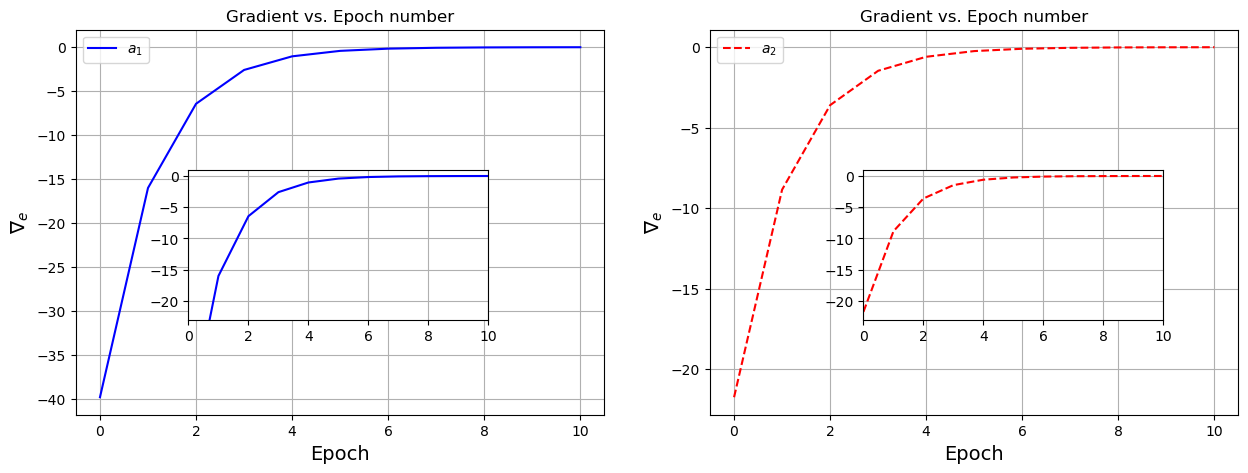

In [17]:
# Plot gradient history.
util.plotGradientHistory(grad_hist, iteration, x_max=10)

**Observações**

+ Percebam que o gradiente varia de forma similar em relação aos dois pesos.
<br/><br/>

+ Isso indica que a superfície de erro é circular, pois sua inclinação é semelhante em ambas as direções, resultando em elementos do vetor gradiente com valores similares.
<br/><br/>

+ A superfície tem inclinação semelhante em ambas as direções.
<br/><br/>

+ Como os valores dos vetores gradiente variam rapidamente em relação a ambos os pesos (ou seja, tendem a zero), a convergência se torna rápida, consecutivamente.

## 3. Normalizando os atributos

+ Agora iremos aplicar normalização aos atributos, trazendo-os para um intervalo mais similar.
<br/><br/>

+ Utilizamos a classe `MinMaxScaler` do módulo `preprocessing` da biblioteca SciKit-Learn.
<br/><br/>

+ Com o parâmetro `feature_range`, podemos alterar o intervalo de variação para o qual queremos trazer os valores dos atributos. No exemplo abaixo, fazemos com que os atributos venham para o intervalo de -1/2 à 1/2.
<br/><br/>

+ O método `fit_transform` calcula a média e o devio padrão de cada atributo e, em seguida, aplica a padronização a cada exemplo da base de dados.

In [18]:
# Import Class MinMaxScaler from module Preprocessing of library sklearn responsible for normalizing the data.
from sklearn.preprocessing import MinMaxScaler

# Instantiate a MinMax scaler.
minMaxScaler = MinMaxScaler(feature_range=(-0.5, 0.5))

# Standardize the features.
scaled_X = minMaxScaler.fit_transform(X)

scaled_x1 = scaled_X[:,0].reshape(N,1)
scaled_x2 = scaled_X[:,1].reshape(N,1)

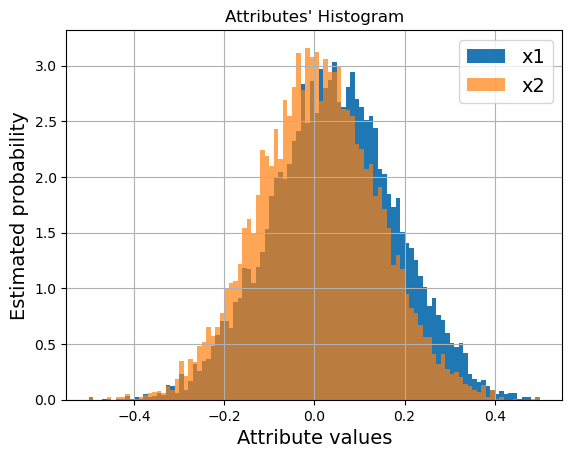

In [19]:
util.plotHistogram(scaled_x1, scaled_x2)

**Observação**: Percebam que ambos os atributos estão agora restritos ao intervalo de -1/2 à 1/2.

### Encontrando os melhores pesos com o gradiente descendente em batelada

A função hipotese que usaremos tem o seguinte formato:

$$h(\textbf{x}) = \hat{a}_1 x_1 + \hat{a}_2 x_2.$$

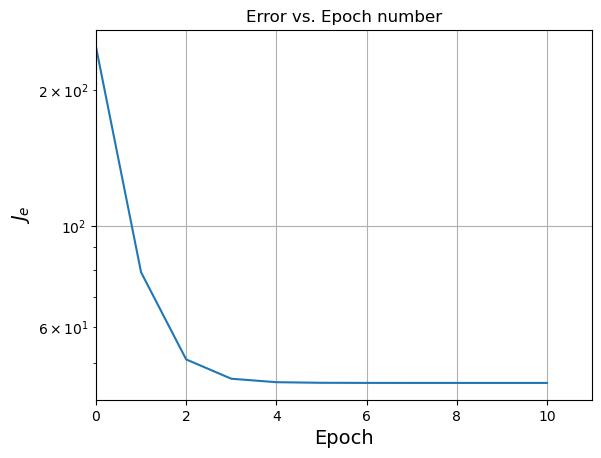

In [20]:
# learning rate.
alpha = 14.0

# Maximum number of iterations.
n_iterations = 10000

# Execute the gradient descent algorithm to find a solution to this regression problem.
a, Jgd, a_hist, grad_hist, iteration = util.batchGradientDescent(scaled_X, y_noisy, alpha, n_iterations)

# Plot the error versus the number of iterations.
util.plotErroVersusIteration(Jgd, iteration)

**Observação**.: Percebam na figura acima, que o algoritmo convergiu após 4 épocas de treinamento. Isso é devido ao formato do superfície de erro, a qual é plotada logo abaixo.

### Encontrando os pesos ótimos com a equação normal.

In [21]:
# Closed-form solution.
a_opt_norm = util.calculateOptimumWeights(scaled_X, y_noisy)

### Plotando as superfícies de erro e de contorno

**OBS**.: A estrela vermelha na superfície de contorno indica a solução ótima encontrada com a equação normal.

In [22]:
# Generate points for plotting the cost-function surface without feature scaling.
J, A1, A2 = util.calculateErrorSurface(scaled_X, y_noisy, 76.0, 96.0, 0.0, 20.0)

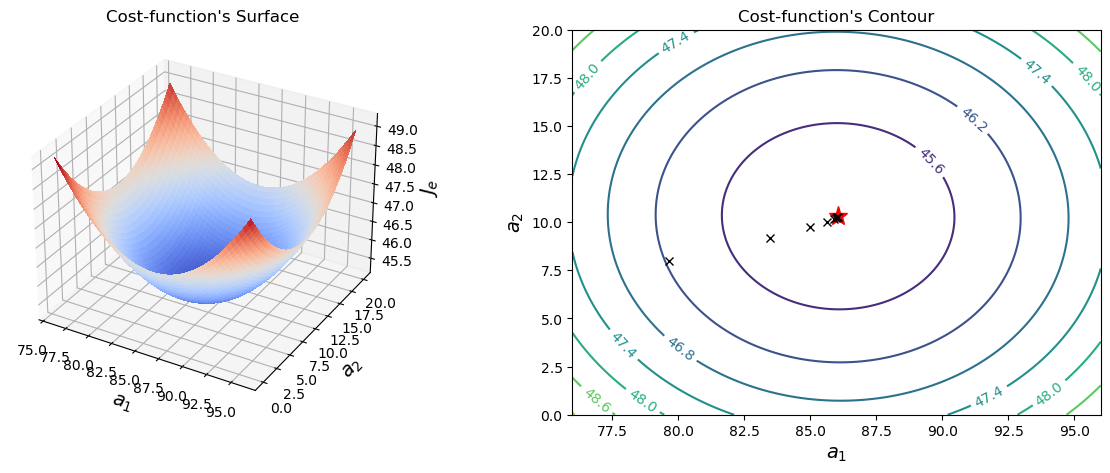

In [23]:
# Plot cost-function surface.
util.plotCostFunction(A1, A2, J, a_opt_norm, a_hist, iteration, 76.0, 96.0, 0.0, 20.0)

#### Observações

+ Quando $x_1$ e $x_2$ têm intervalos de variação semelhantes, então, a variação tanto de $\hat{a}_1$ quanto de $\hat{a}_2$ tem peso semelhante na variação do erro (i.e., no seu cálculo), fazendo com que a superfície tenha um formato de tigela (i.e., circular).
<br/><br/>

+ O gradiente descendente sempre caminha (aponta) na direção de máxima declividade e, aqui, devido à variação do erro ser similar em todas as direções, ele aponta (caminha) diretamente para o ponto de mínimo global.
<br/><br/>

+ A direção de máxima declividade está exatamente entre os eixos de $\hat{a}_1$ e $\hat{a}_2$ (i.e., $45^o$), pois $x_1$ e $x_2$ têm intervalos de variação similares.
<br/><br/>

+ Convergência é rápida devido ao formato de tigela (circular) da superfície.
    + Em aproximadamente 4 épocas já temos convergência.

### Plotando o histórico dos valores do vetor gradiente ao longo das épocas de treinamento

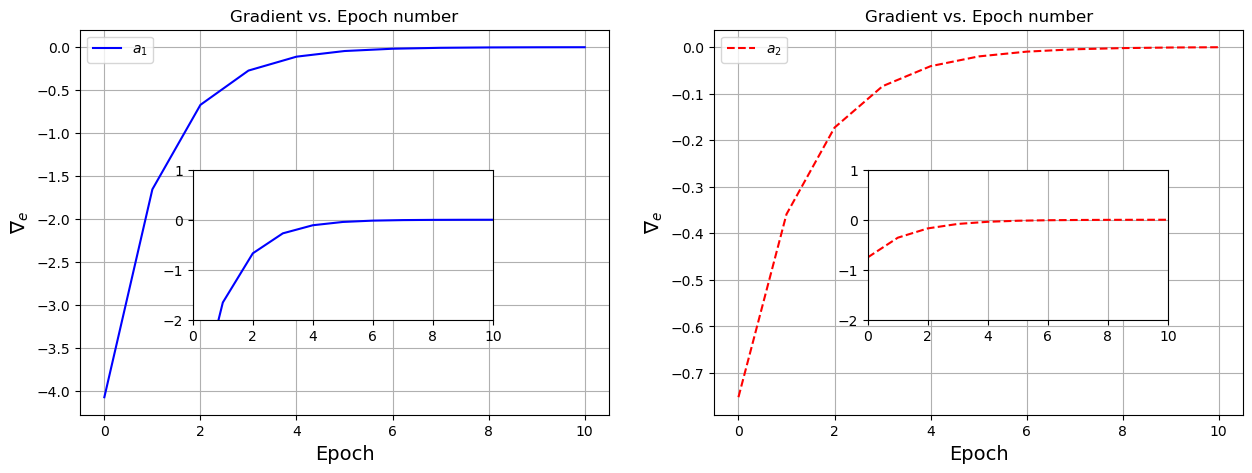

In [24]:
util.plotGradientHistory(grad_hist, iteration, x_max=10)

**Observações**

+ Percebam que o gradiente varia de forma similar em relação aos dois pesos.
<br/><br/>

+ Isso indica que a superfície de erro é circular, pois sua inclinação é semelhante em ambas as direções, resultando em elementos do vetor gradiente com valores similares.
<br/><br/>

+ A superfície tem inclinação semelhante em ambas as direções.
<br/><br/>

+ Como os valores dos vetores gradiente variam rapidamente em relação a ambos os pesos (ou seja, tendem a zero), a convergência se torna rápida, consecutivamente.